In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import GridSearchCV


In [2]:
X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=2529)

rfc = RandomForestClassifier()

# train model
rfc.fit(X_train, y_train)

# predict
y_pred = rfc.predict(X_test)

# accuracy
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))


              precision    recall  f1-score   support

           0       0.95      0.88      0.91        64
           1       0.93      0.97      0.95       107

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171

Number of mislabeled points out of a total 171 points : 11


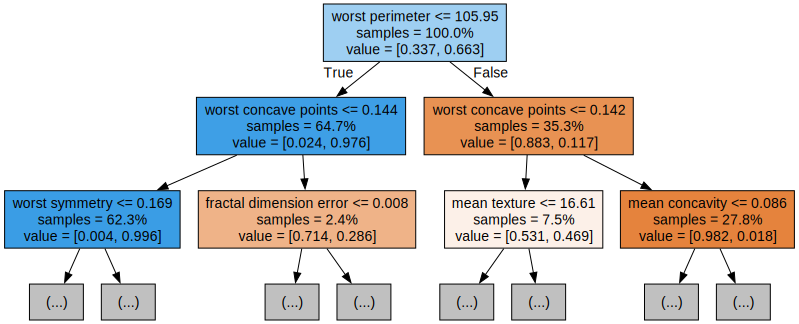

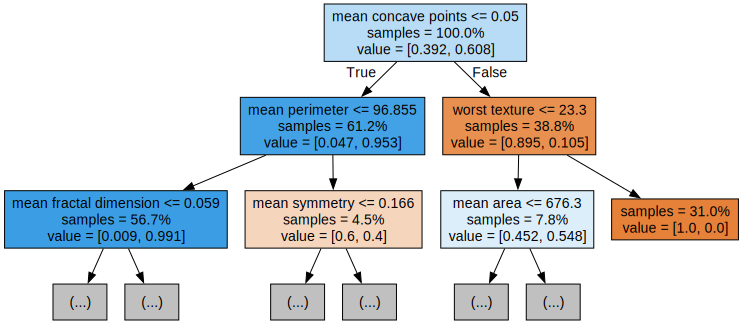

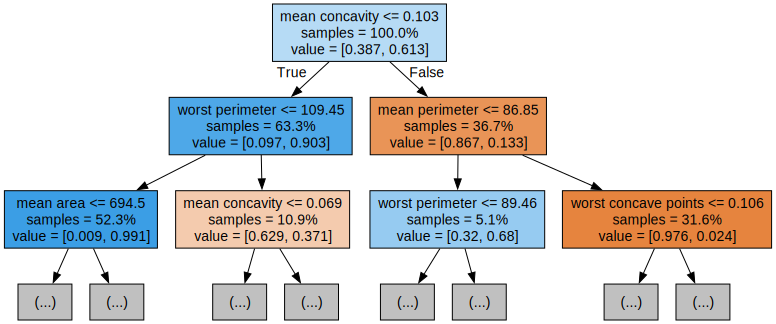

In [3]:

for i in range(3):
    tree = rfc.estimators_[i]
    dot_data =  export_graphviz(tree,
                               feature_names=load_breast_cancer().feature_names,
                               #feature_names=X_train.columns  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

C:\Users\karino\AppData\Local\Temp\ipykernel_9412\3872423920.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


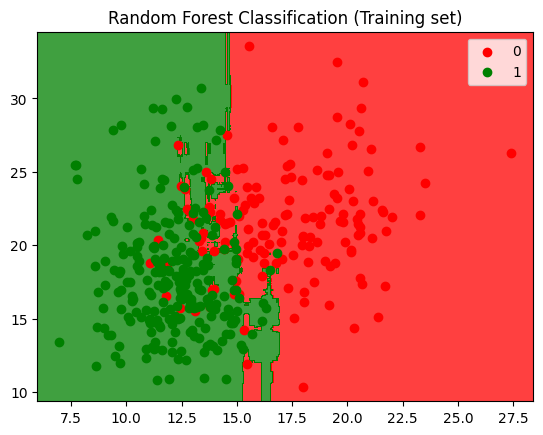

In [4]:

X_set, y_set = X_train[:,0:2], y_train
rfc.fit(X_set,y_set)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, rfc.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
#plt.xlabel(X_train.columns[0])
#plt.ylabel(y_set.columns)
plt.legend()
plt.show()

In [ ]:
parameters = {'n_estimators': [100,200,300,400,500],
              'max_depth': range(1,10),
              'criterion':['gini','entropy']}
grid = GridSearchCV(estimator = rfc,
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5)


#4 train grid
grid.fit(X_train,y_train)

print(grid.best_score_)
print(grid.best_params_)

#5 predict grid
y_pred = grid.predict(X_test)

#6 evaluation grid
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))